In [5]:
#@title libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
# @title Mount drive
# import os
# from google.colab import drive


# drive.mount('/content/drive')


# path_dataset = "MATERIAS_SISTEMAS_UIS/Estadistica_1/Proyecto/Dataset"
# path = "/content/drive/MyDrive/" + path_dataset

# # Verificar si el directorio existe antes de cambiar
# if os.path.exists(path):
#     os.chdir(path)
#     print("Directorio cambiado a:", os.getcwd())
# else:
#     print(f"Error: El directorio '{path}' no existe. Verifica la ruta en tu Google Drive.")


In [ ]:
# @title Load dataset
df = pd.read_csv("https://drive.google.com/uc?id=1-ih35GtpwxeZkNfypUt0Ab-HgM9r1QHT")
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [ ]:
# @title Remove null columns
cost_cols = ['Tuition_USD','Living_Cost_Index','Rent_USD','Visa_Fee_USD','Insurance_USD']
df = df.dropna(subset=cost_cols)
df = df[(df[cost_cols] != 0).all(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            804 non-null    object 
 1   City               804 non-null    object 
 2   University         804 non-null    object 
 3   Program            804 non-null    object 
 4   Level              804 non-null    object 
 5   Duration_Years     804 non-null    float64
 6   Tuition_USD        804 non-null    int64  
 7   Living_Cost_Index  804 non-null    float64
 8   Rent_USD           804 non-null    int64  
 9   Visa_Fee_USD       804 non-null    int64  
 10  Insurance_USD      804 non-null    int64  
 11  Exchange_Rate      804 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 81.7+ KB


In [7]:
avg_tuition = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)
avg_tuition.head()

,Tuition_USD
Country,
USA,47742.307692
Australia,34610.465116
Singapore,34172.222222
UK,30341.935484
Canada,29456.578947


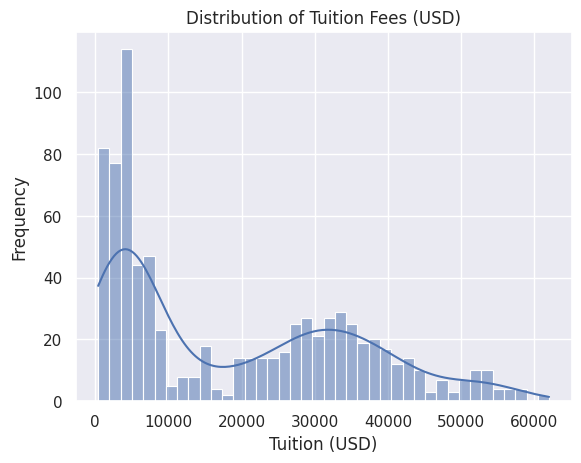

In [18]:
sns.histplot(df['Tuition_USD'], bins=40, kde=True)
plt.title('Distribution of Tuition Fees (USD)')
plt.xlabel('Tuition (USD)')
plt.ylabel('Frequency')
plt.show()

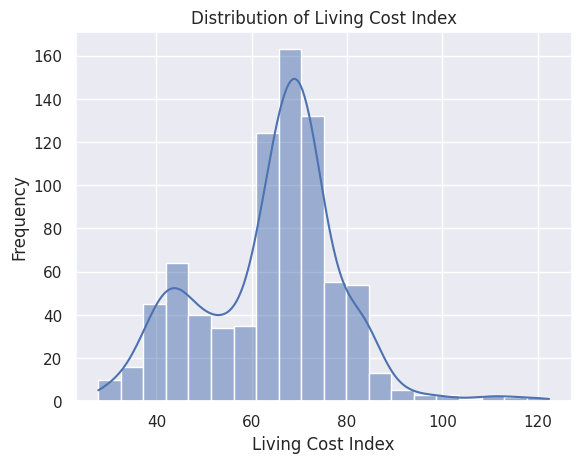

In [12]:
sns.histplot(df['Living_Cost_Index'], bins=20, kde=True)
plt.title('Distribution of Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Frequency')
plt.show()

In [16]:
len(df['Tuition_USD'].unique())

273

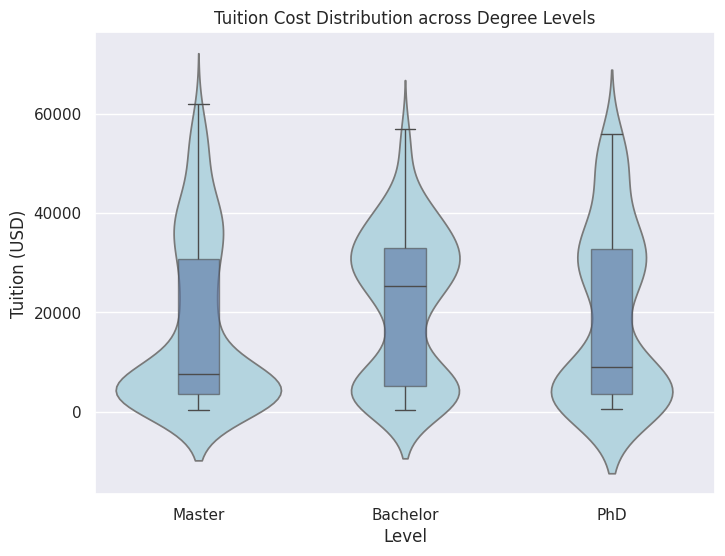

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the violin plot
sns.violinplot(x='Level', y='Tuition_USD', data=df, inner=None, ax=ax, color='lightblue')

# Overlay the boxplot
sns.boxplot(x='Level', y='Tuition_USD', data=df, width=0.2, ax=ax, boxprops=dict(alpha=0.6))

# Customize labels and title
ax.set_ylabel('Tuition (USD)')
ax.set_title('Tuition Cost Distribution across Degree Levels')

plt.show()


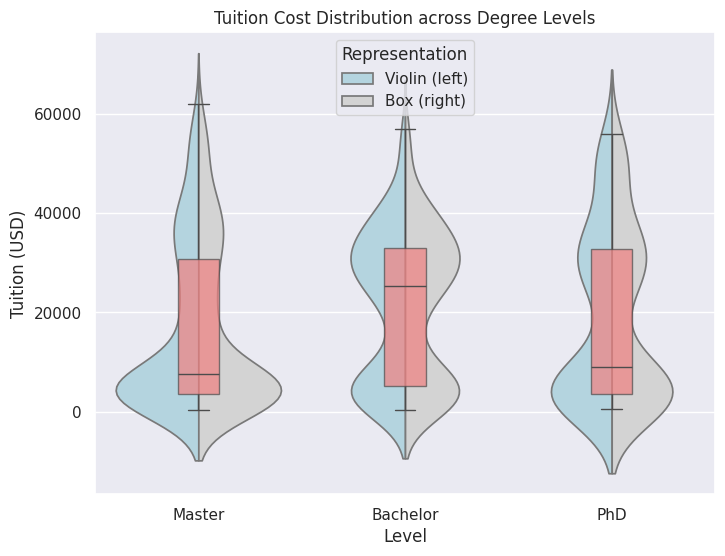

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a duplicated dataframe with 'Type' column
df_violin = df.copy()
df_violin['Type'] = 'Violin'

df_box = df.copy()
df_box['Type'] = 'Box'

df_combined = pd.concat([df_violin, df_box])

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Split violin plot (left side = violin, right side = box placeholder)
sns.violinplot(x='Level', y='Tuition_USD', hue='Type', data=df_combined, split=True,
               inner=None, palette={'Violin': 'lightblue', 'Box': 'lightgray'}, ax=ax)

# Overlay the boxplot (this will appear centered, but visually fills right side)
sns.boxplot(x='Level', y='Tuition_USD', data=df, width=0.2, ax=ax,
            boxprops=dict(alpha=0.7, facecolor='lightcoral'))

# Clean up the legend (optional)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Violin (left)', 'Box (right)'], title='Representation')

# Labels and title
ax.set_ylabel('Tuition (USD)')
ax.set_title('Tuition Cost Distribution across Degree Levels')

plt.show()
